In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [3]:
def concatenated_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

# Should I create a copy of the dataset as part of good practice? 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concatenated_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Sets' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
df_train.sample(3)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S


In [4]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
# This prints column missing values and sums up the total number of missing values per category.
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2
Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0


# Data preprocessing

## Dealing with Missing Values

### Age

In [5]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
7,Age,PassengerId,0.028814
19,Age,Survived,0.077221
23,Age,Parch,0.150917
26,Age,Fare,0.178740
31,Age,SibSp,0.243699
39,Age,Pclass,0.408106
42,Age,Age,1.000000


In [6]:
df_all_corr = df_all.corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Pclass']

,Feature 1,Feature 2,Correlation Coefficient
5,Pclass,Parch,0.018322
13,Pclass,PassengerId,0.038354
16,Pclass,SibSp,0.060832
35,Pclass,Survived,0.338481
38,Pclass,Age,0.408106
40,Pclass,Fare,0.558629
44,Pclass,Pclass,1.000000


In [7]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_all['Age'].median()))
# Median age of 'Pclass' groups is the best choice because of its high correlation with Age (0.451983) and Survived (0.338481). 
# It is also more logical to group ages by passenger classes instead of other features.
# When 'Pclass' increases (1 being the highest), the median age for both males and females also increases. 
# However, females tend to have slightly lower median Age than males. 

df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


### Embark

In [12]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [13]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

### fare

In [16]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [15]:
median_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Logically, 'Fare' is related to family size ('Parch' and 'SibSp') and 'Pclass' features.
df_all['Fare'] = df_all['Fare'].fillna(median_fare)

### Cabin

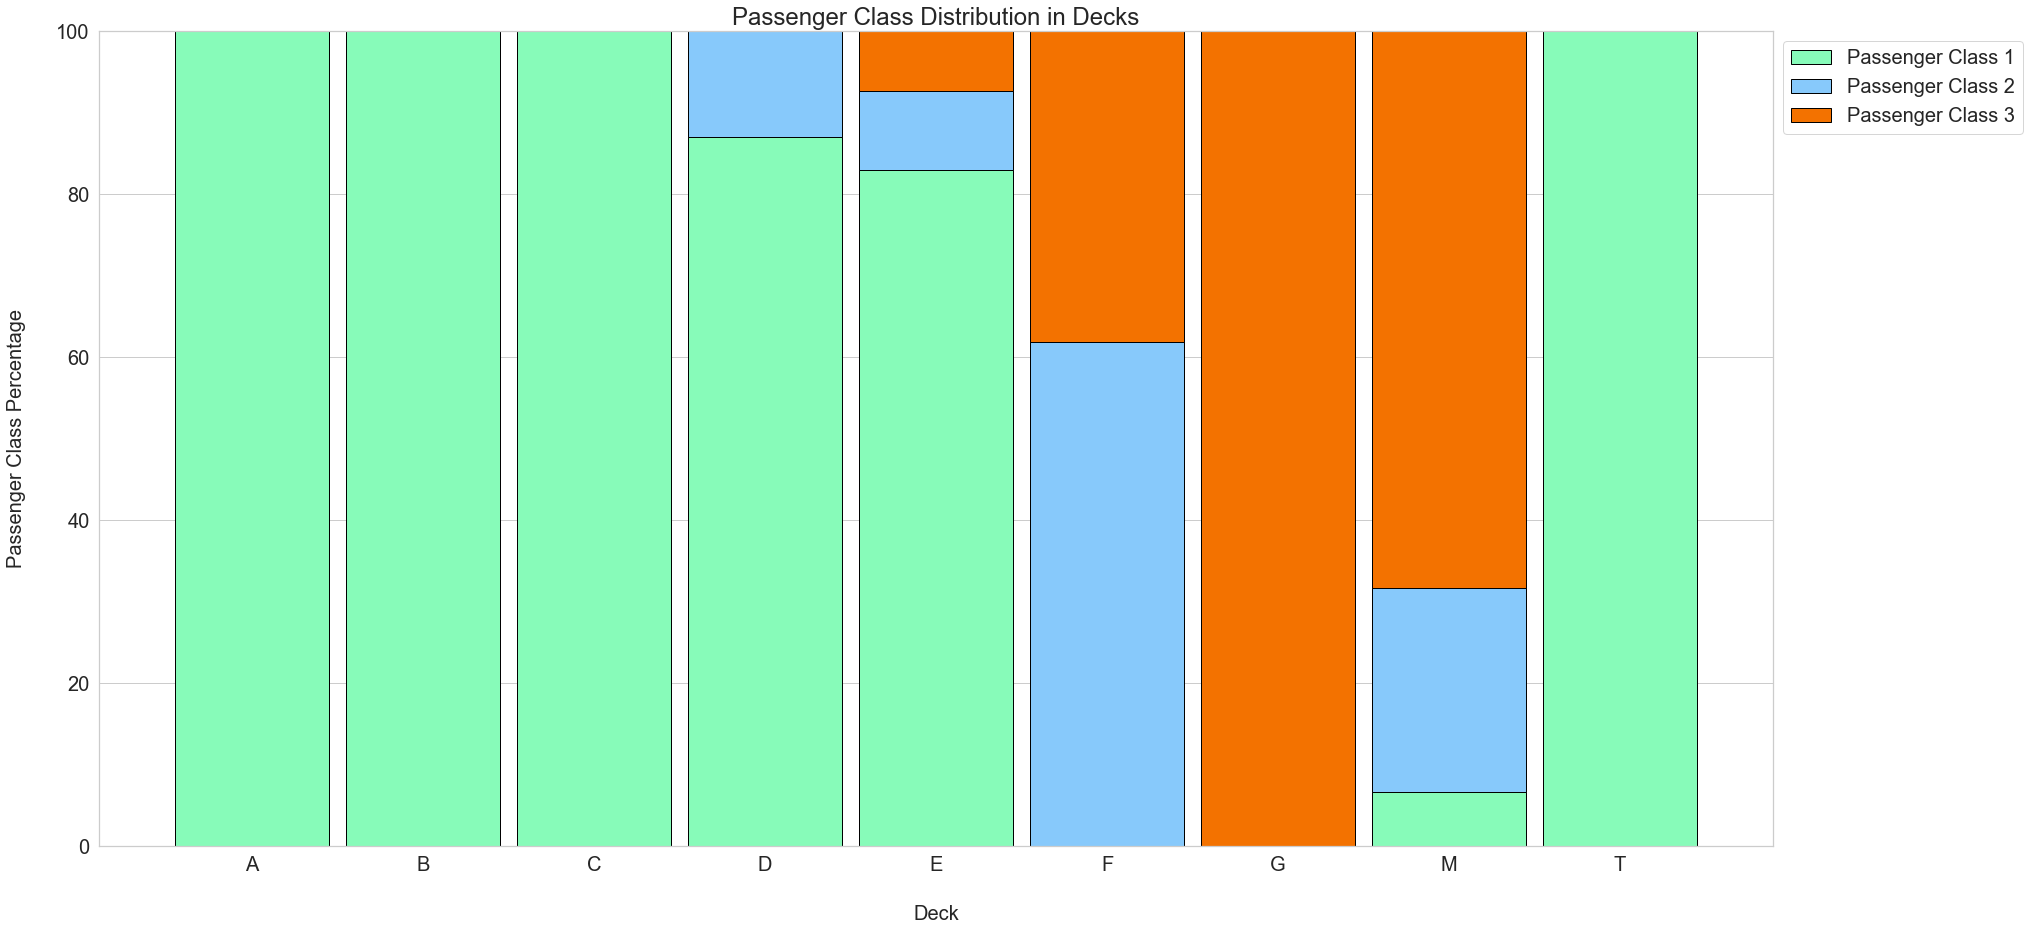

In [17]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
# The 'Cabin' feature has many missing values and it cannot be simply ignored because some cabins might have higher survival rates.
# I created the 'Deck' column from the first letter of the Cabin column. 
# M stands for Missing Value.
df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()
# After looking at the datasets and doing some research, it turns out that the first letter of the 'Cabin' values are the decks in which they are located.


def get_pclass_dist(df):
    
    
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}
    # Created a dictionary for every passenger class count in every deck

    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages
    # Created a dictionary for every passenger class percentage in every deck

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.9
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(30, 15))
    plt.bar(bar_count, pclass1, color='#87fbb9', edgecolor='black', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#87c9fb', edgecolor='black', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#f37200', edgecolor='black', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=20, labelpad=30)
    plt.ylabel('Passenger Class Percentage', size=20, labelpad=30)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 20})
    plt.title('Passenger Class Distribution in Decks', size=24, y=1)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)
# Decks A, B, C were only for Pclass 1. 100% of A, B and C decks are 1st class passengers
# Deck D was for Pclasses 1 and 2. Deck D has 87% 1st class and 13% 2nd class passengers
# Deck E was for all Pclasses. Deck E has 83% 1st class, 10% 2nd class and 7% 3rd class passengers
# Deck F was only for Pclasses 2 and 3. Deck F has 62% 2nd class and 38% 3rd class passengers
# Deck G was only for Pclass 3. 100% of G deck are 3rd class passengers
# M contains all the passengers with missing values.
# There is 1 Pclass 1 passenger in Deck T.

In [18]:
dect_regroup = df_all[df_all['Deck'] == 'T'].index
df_all.loc[dect_regroup, 'Deck'] = 'A'
# Deck T has the closest resemblance to Deck A, so I decided to regroup that 1 passenger with Deck A.

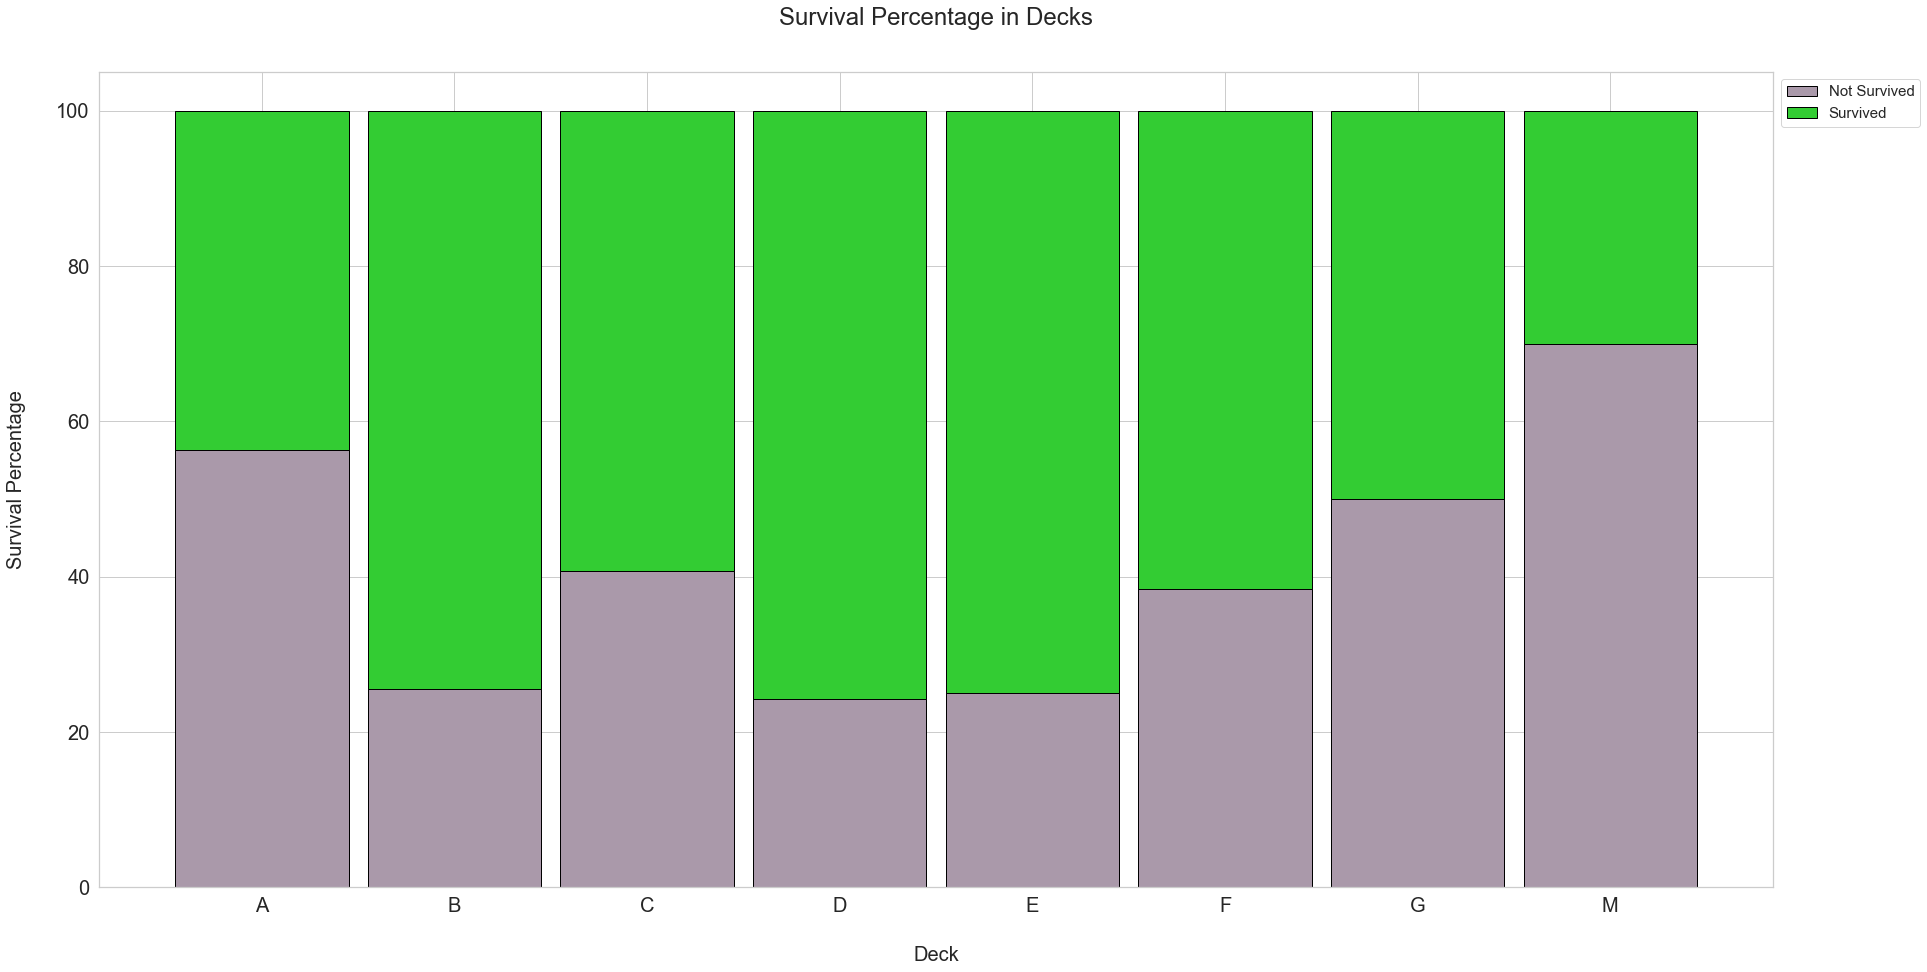

In [19]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages
    # Created a dictionary for every survival count in every deck
    
def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.9   

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(30, 15))
    plt.bar(bar_count, not_survived, color='#aa99aa', edgecolor='black', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#33cc33', edgecolor='black', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=20, labelpad=30)
    plt.ylabel('Survival Percentage', size=20, labelpad=30)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=24, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)
# To count the survival rate per deck
# Every deck has different survival rates.
# Decks B, C, D E, and F have the highest survival rates. These decks are mostly occupied by Pclass 1.
# M has the lowest survival rate which was mostly occupied by 2nd and 3rd class passengers.
# Though it might be that the cabin data of the victims in M is unretrievable, that's why it has the lowest survival rate.
# Cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers.

In [20]:
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)
# Dropped 'Cabin' because 'Deck' exists already and to prevent multicollinearity.

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0
Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


In [22]:
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')